In [34]:
import pandas as pd
%matplotlib inline

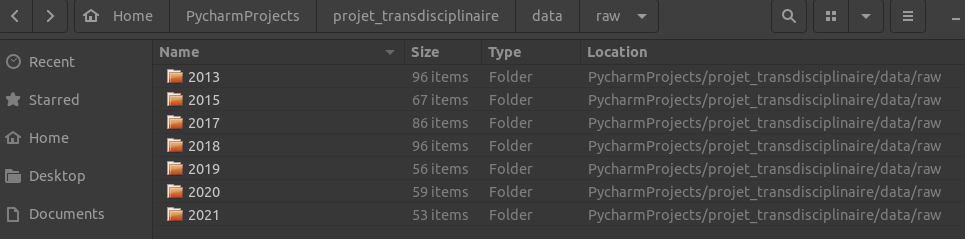

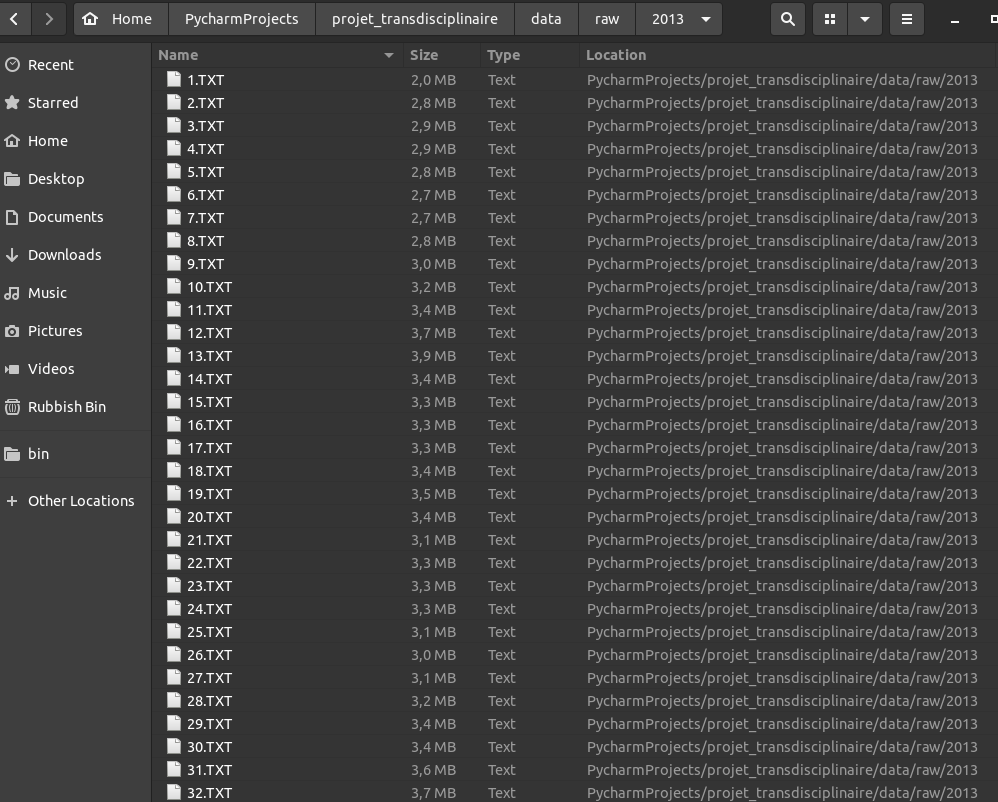

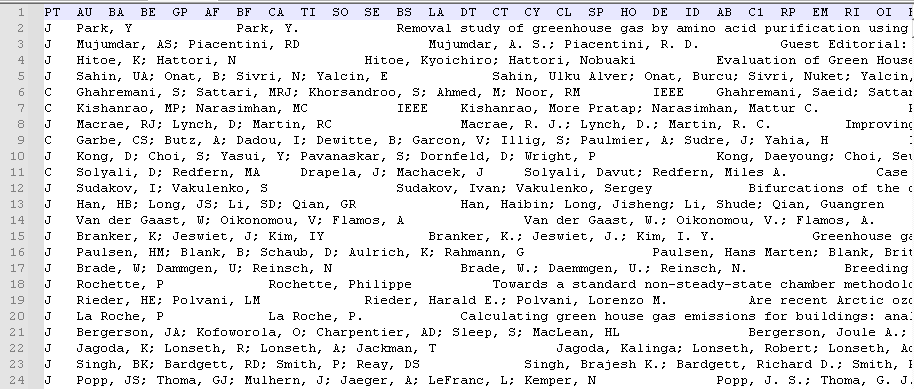

#### How to open and load as a dataframe each text file (reading_cleaning.py)
```python
    lst_of_df = []
    # We explore the folder and its subfolder looking for .txt to be read as dataframes
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            file_path = subdir + '/' + file
            try:
                # Error bad lines = False to skip parsing errors on somes lines
                df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False, 
                                 error_bad_lines=False)
                # we keep only a handful of useful variables, to avoid bugs, we only keep the file if 
                # our 8 variables
                # are present.
                columns = ['PT', 'AU', 'TI', 'LA', 'DE', 'AB', 'C1', 'PY']
                set_columns = set(columns)
                if set_columns.issubset(set(df.columns)):
                    # making sure to only keep rows that have the proper columns
                    df = df[['PT', 'AU', 'TI', 'LA', 'DE', 'AB', 'C1', 'PY']]
                else:
                    continue

                # We need to remove NaN values
                df = df.dropna()
                # C1 the Author address is changed to keep only the country
                # df['C1'] = df['C1'].apply(lambda x: x.split(', ')[-1])
                lst_of_df.append(df)
            except pd.errors.ParserError:
                print(file_path)

    df_concat = pd.concat(lst_of_df)
    df_concat.to_csv("data/clean_data/full_data.csv", columns=columns, header=True, index=False, sep='\t')
    return df_concat
```

two+AF8-character field tags	https://images.webofknowledge.com/images/help/WOS/hs+AF8-wos+AF8-fieldtags.html
FN	File Name  
VR	Version Number  
PT	Publication Type (J+AD0-Journal+ADs- B+AD0-Book+ADs- S+AD0-Series+ADs- P+AD0-Patent)  

AU	Authors  

AF	Author Full Name  

BA	Book Authors  

BF	Book Authors Full Name  

CA	Group Authors  

GP	Book Group Authors  

BE	Editors  

TI	Document Title  

SO	Publication Name  

SE	Book Series Title  

BS	Book Series Subtitle  

LA	Language  

DT	Document Type  

CT	Conference Title  

CY	Conference Date  

CL	Conference Location
SP	Conference Sponsors
HO	Conference Host
DE	Author Keywords
ID	Keywords Plus+AK4- 
AB	Abstract
C1	Author Address
RP	Reprint Address
EM	E+AC0-mail Address
RI	ResearcherID Number
OI	ORCID Identifier (Open Researcher and Contributor ID)
FU	Funding Agency and Grant Number
FX	Funding Text
CR	Cited References
NR	Cited Reference Count
TC	Web of Science Core Collection Times Cited Count
Z9	Total Times Cited Count (Web of Science Core Collection, Arabic Citation Index, BIOSIS Citation Index, Chinese Science Citation Database, Data Citation Index, Russian Science Citation Index, SciELO Citation Index)
U1	Usage Count (Last 180 Days)
U2	Usage Count (Since 2013)
PU	Publisher
PI	Publisher City
PA	Publisher Address
SN	International Standard Serial Number (ISSN)
EI	Electronic International Standard Serial Number (eISSN)
BN	International Standard Book Number (ISBN)
J9	29+AC0-Character Source Abbreviation
JI	ISO Source Abbreviation
PD	Publication Date
PY	Year Published
VL	Volume
IS	Issue
SI	Special Issue
PN	Part Number
SU	Supplement
MA	Meeting Abstract
BP	Beginning Page
EP	Ending Page
AR	Article Number
DI	Digital Object Identifier (DOI)
D2	Book Digital Object Identifier (DOI)
EA	Early access date
EY	Early access year
PG	Page Count
P2	Chapter Count+AKA-(Book Citation Index)
WC	Web of Science Categories
SC	Research Areas
GA	Document Delivery Number
PM	PubMed ID
UT	Accession Number
OA	Open Access Indicator
HP	ESI Hot Paper. Note that this field is valued only for ESI subscribers.
HC	ESI Highly Cited Paper. Note that this field is valued only for ESI subscribers.
DA	Date this report was generated.
ER	End of Record
EF	End of File

We kept 8 columns out of 73.    

| Abrev | Full name |
|----|------------------|
| AU | Authors          |
| TI | Title            |
| DE | Keywords         |
| AB | Abstract         |
| C1 | Authors Address  |
| PY | Year Published   |
| LA | Language         |
| PT   |     Publication Type             |


In [35]:
file_path = "data/clean_data/full_data.csv"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344659 entries, 0 to 344658
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PT      344659 non-null  object 
 1   AU      344659 non-null  object 
 2   TI      344659 non-null  object 
 3   LA      344659 non-null  object 
 4   DE      344659 non-null  object 
 5   AB      344659 non-null  object 
 6   C1      344659 non-null  object 
 7   PY      344659 non-null  float64
dtypes: float64(1), object(7)
memory usage: 21.0+ MB


In [36]:
df.PT.describe()

count     344659
unique         4
top            J
freq      314738
Name: PT, dtype: object

In [37]:
df.AU.describe()

count         344659
unique        326852
top       Viegas, DX
freq              29
Name: AU, dtype: object

In [38]:
df.TI.describe()

count                                              344659
unique                                             343335
top       Overview of Japanese Earth observation programs
freq                                                    8
Name: TI, dtype: object

### 350 763 unique titles, 33 598 duplicates

In [39]:
print(df.DE[0])
df.DE.describe()

Reservoir operation; Flood water conservation; Forecast uncertainty; Stochastic programming with recourses; Multiobjective optimization


count                                                344659
unique                                               342781
top       Advocacy; collective action; mobilization; soc...
freq                                                     11
Name: DE, dtype: object

In [40]:
df.C1[0]

'China'

### C1 (Authors address) might be more interesting as a Country only column...

In [41]:
df.PY.describe()

count    344659.000000
mean       2016.569517
std          19.117473
min           4.000000
25%        2014.000000
50%        2017.000000
75%        2019.000000
max        2022.000000
Name: PY, dtype: float64

### PY (Published Year), only floats, that's good. But some values are not year-like (for ex min = 4), it needs fixing.

## Language Analysis

In [42]:
df1 = df.groupby("LA").count().sort_values(by="AB", ascending=False)
df1["PT"]

LA
English    344659
Name: PT, dtype: int64

Option proposée 
On modifie la base de données en proposant un nombre fixe de langues.


## Language issue ["LA"]:

```python
    # Only keeping main languages to filter wrongly parsed rows
    lst_of_language = ["English", "Spanish", "Portugese", "Chinese", "French", "Russian", "German",
                       "Korean", "Turkish",
                       "Polish", "Czech", "Japanese", "Italian"]
    condition = df.LA.isin(lst_of_language)
    df = df[condition]
```

## Country issues ["C1"]:
USA + post code ==>  US or United States
Peoples R China ==> China
England ==> United Kingdom

```python
    # fixing countries
    df['C1'] = df['C1'].apply(lambda x: x.split(", ")[-1] if "USA" not in x else "United States")
    df['C1'] = df['C1'].replace(['Peoples R China'], 'China')
```

## Year issue ["PY"] for Published Year :
Some mistakes where PY is not a date but a random float like 4.
```python
    condition_year = df.PY > 2009
    df = df[condition_year]
```

## Duplicates
We have no reason to keep them.
```python
    # Dropping duplicated
    print(df.duplicated().sum())
    df = df.drop_duplicates()
    33245

```

## Saving new file
```python
    columns = ['PT', 'AU', 'TI', 'LA', 'DE', 'AB', 'C1', 'PY']
    df.to_csv("data/clean_data/full_data_fixed_language_country_year_no_dups.csv", columns=columns, header=True, 
              index=False, sep='\t')
   
```

In [10]:
# Voir script fixed_languages_country_year_no_dups.py
file_path = "data/clean_data/full_data_fixed_language_country_year_no_dups.csv"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349497 entries, 0 to 349496
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PT      349497 non-null  object 
 1   AU      349497 non-null  object 
 2   TI      349497 non-null  object 
 3   LA      349497 non-null  object 
 4   DE      349497 non-null  object 
 5   AB      349497 non-null  object 
 6   C1      349497 non-null  object 
 7   PY      349497 non-null  float64
dtypes: float64(1), object(7)
memory usage: 21.3+ MB


In [11]:
df_language = df.groupby("LA").count().sort_values(by="AB", ascending=False)
df_language["PT"]

LA
English     343467
Spanish       2453
Chinese        834
French         681
Russian        622
German         482
Korean         296
Turkish        197
Polish         180
Czech          111
Japanese        97
Italian         77
Name: PT, dtype: int64

## Country analysis 

In [12]:
#  Address 
df_address = df.groupby("C1").count().sort_values(by = "AB", ascending=False)

df_address.reset_index(level=0, inplace=True)

df_address = df_address[["C1", "PT"]]
df_address['C1'] = df_address['C1'].replace(['United States'], 'US')
df_address['C1'] = df_address['C1'].replace(['England'], 'UK')
tot = df_address.PT.sum()
# Percentage
df_address["Ratio"] = round(df_address['PT']*100/tot,2)
df_address

,C1,PT,Ratio
0,US,86045,24.62
1,China,38208,10.93
2,UK,16076,4.60
3,Australia,15298,4.38
4,Germany,14682,4.20
...,...,...,...
203,Anguilla,1,0.00
204,Suriname,1,0.00
205,Timor-Leste,1,0.00
206,San Marino,1,0.00


In [43]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "kaggle"


In [14]:
import plotly.express as px
fig = px.scatter_geo(df_address, locations="C1",locationmode = 'country names',
                     hover_name="Ratio", size="PT", size_max=30, projection="equirectangular")
fig.show()

### Same but with time animation

In [15]:
df_visu = df.groupby(["C1", "PY"]).count().sort_values(by = "AB", ascending=False)
df_visu.reset_index(level=0, inplace=True)
df_visu.reset_index(level=0, inplace=True)
df_visu['C1'] = df_visu['C1'].replace(['England'], 'UK')
df_visu = df_visu.sort_values(by = "PY", ascending = True)
df_visu

,PY,C1,PT,AU,TI,LA,DE,AB
1932,2010.0,Afghanistan,1,1,1,1,1,1
1596,2010.0,Mali,2,2,2,2,2,2
450,2010.0,South Korea,117,117,117,117,117,117
1587,2010.0,Panama,2,2,2,2,2,2
1583,2010.0,Greenland,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
1713,2022.0,Iran,1,1,1,1,1,1
1854,2022.0,Netherlands,1,1,1,1,1,1
1251,2022.0,China,5,5,5,5,5,5
1664,2022.0,Morocco,1,1,1,1,1,1


In [16]:
fig = px.scatter_geo(df_visu, locations="C1",locationmode = 'country names',
                     hover_name="C1", size="PT", size_max =50, animation_frame="PY")
fig.show()

### Countplot by year

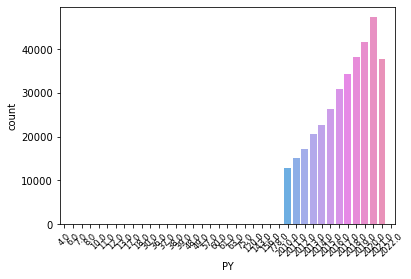

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df, x="PY")


### US vs China

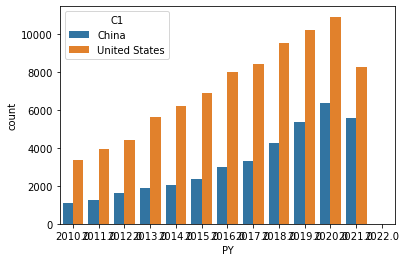

In [18]:
condition_US = (df["C1"].isin(["United States", "China"]))
df_us = df[condition_US]
graph2 = sns.countplot(data = df_us, x = "PY", hue="C1")

### Document Type

In [19]:
df.PT.describe()

count     349497
unique         4
top            J
freq      319414
Name: PT, dtype: object

<AxesSubplot:xlabel='count', ylabel='PT'>

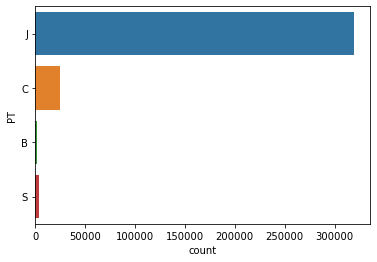

In [20]:
sns.countplot(data = df, y="PT")
# PT	Publication Type (J+AD0-Journal+ADs- B+AD0-Book+ADs- S+AD0-Series+ADs- P+AD0-Patent)

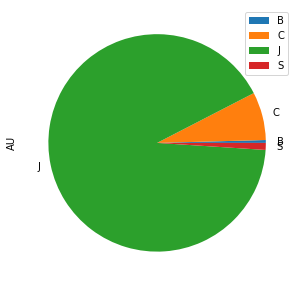

In [21]:
df_pt = df.groupby(["PT"]).count()
df_pt
plot = df_pt.plot.pie(y='AU', figsize=(5, 5), subplots=True)



# Filtering 

```python
keyword_csv = pd.read_csv("data/ai_keywords.csv", sep="\t", encoding="utf-8")
lst_ai = []
for keyword in keyword_csv["Artificial Intelligence"]:
    lst_ai.append(keyword)
pattern = '|'.join([f'(?i){keyword}' for keyword in lst_ai])
condition = df.TXT.str.contains(pattern, na=False)
df = df[condition]
df.to_csv("data/clean_data/full_data_filtered.csv", columns=columns, header=True, index=False, sep='\t')
```

In [22]:
keyword_csv = pd.read_csv("data/ai_keywords.csv", sep="\t", encoding="utf-8")
for keyword in keyword_csv["Artificial Intelligence"]:
    print(keyword)

Artificial intellig*
Automated reasoning
Backpropagation
Computer vision
Data mining
Data science
Deep learning
Expert system*
Face detection
Feature extraction
Generative adversarial network*
Gesture recognition
Image classification
Image recognition
Image segmentation
Information retrieval
Intelligent machine*
Kernel machine
Knowledge representation
Machine intelligence
Machine learning
Machine translation
Meta-learning
Multilayer perceptron*
Natural language processing
Neural net*
Object detection
Object identification
Object recognition
Pattern recognition
Pose estimation
Reinforcement learning
Semantic search
Semi-supervised learning
Sentiment analysis
Speech recognition
Statistical learning
Supervised learning
Text classification
Transfer learning
Transformer network*
Unsupervised learning
Voice recognition


In [19]:
import pandas as pd
df_filtered = pd.read_csv("data/clean_data/full_data_filtered.csv", sep='\t', encoding='utf-8', index_col=False)
df_filtered.head(5)

,PT,AU,TI,LA,DE,AB,C1,PY,TXT
0,J,"Yang, J; Deng, X; Liu, QQ; Ding, RH",Temperature error-correction method for surfac...,English,climate change; computational fluid dynamics; ...,"In climate change research, accurate temperatu...",China,2020.0,Temperature error-correction method for surfac...
1,J,"Mishra, U; Gautam, S; Riley, WJ; Hoffman, FM",Ensemble Machine Learning Approach Improves Pr...,English,soil organic carbon; spatial prediction; machi...,Various approaches of differing mathematical c...,United States,2020.0,Ensemble Machine Learning Approach Improves Pr...
2,J,"Coro, G",OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...,English,artificial intelligence; big data; blue growth...,The long-term EU strategy to support the susta...,Italy,2020.0,OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...
3,J,"Siddiqui, S; Conkle, JL; Sadovski, A",Contiguous US surface water availability and s...,English,Wastewater treatment plant effluent flow model...,Surface water is a vital and sometimes stresse...,United States,2020.0,Contiguous US surface water availability and s...
4,J,"Webber, H; Lischeid, G; Sommer, M; Finger, R; ...",No perfect storm for crop yield failure in Ger...,English,crop yield failure; extreme events; support ve...,Large-scale crop yield failures are increasing...,Germany,2020.0,No perfect storm for crop yield failure in Ger...


In [20]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df_filtered, x="PY").set_title('Number of scientific articles related to AI per year')

NameError: name 'plt' is not defined

In [21]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df, x="PY").set_title('Number of scientific articles related to Climate action per year')

NameError: name 'plt' is not defined

In [22]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PT      5556 non-null   object 
 1   AU      5556 non-null   object 
 2   TI      5556 non-null   object 
 3   LA      5556 non-null   object 
 4   DE      5556 non-null   object 
 5   AB      5556 non-null   object 
 6   C1      5556 non-null   object 
 7   PY      5556 non-null   float64
 8   TXT     5556 non-null   object 
dtypes: float64(1), object(8)
memory usage: 390.8+ KB


### From **382742** rows related to climate change to **5899** rows related climate change AND IA. 1.5% of the corpus is related to IA.

## First Example
'Temperature error-correction method for surface air temperature data climate change; computational fluid dynamics; correction method; **neural network algorithm**; temperature data; temperature error In climate change research, accurate temperature data are often demanded. However, affected by many factors, especially solar radiation, the accuracy of environmental air temperature measurement can be greatly reduced, since there is a difference in temperature between the environmental air and the related temperature measured by the sensor accommodated inside the radiation shield. In the paper, the term "temperature error" refers to the temperature difference described above. To improve the accuracy of the temperature data, a temperature error-correction method is proposed. First, a computational fluid dynamics (CFD) method is adopted to quantify the temperature errors accurately. **A neural network algorithm** is then applied to form a universal correction equation by fitting temperature errors calculated using the CFD method. Finally, to validate the correction equation, field observation experiments are performed. The root mean square error (RMSE) and the mean absolute error (MAE) between the temperature errors obtained experimentally using a sensor inside the DTR503A shield and the corresponding temperature errors determined by using the proposed correction method are 0.043 and 0.038 degrees C, respectively. The RMSE and MAE for the DTR13 radiation shield are 0.049 and 0.044 degrees C, respectively. This method may reduce the error of the temperature data to 0.05 degrees C. If the environmental factors corresponding to the temperature data can be quantified accurately, the factors influencing the temperature error can be added to the correction method continuously. The accuracy of this correction method may be furtherly improved.'


## Second Example
'Ensemble Machine Learning Approach Improves Predicted Spatial Variation of Surface Soil Organic Carbon Stocks in Data-Limited Northern Circumpolar Region soil organic carbon; spatial prediction; **machine learning**; permafrost soils; environmental controllers Various approaches of differing mathematical complexities are being applied for spatial prediction of soil properties. Regression kriging is a widely used hybrid approach of spatial variation that combines correlation between soil properties and environmental factors with spatial autocorrelation between soil observations. In this study, we compared four **machine learning approaches** (**gradient boosting machine, multinarrative adaptive regression spline, random forest, and support vector machine**) with regression kriging to predict the spatial variation of surface (0-30 cm) soil organic carbon (SOC) stocks at 250-m spatial resolution across the northern circumpolar permafrost region. We combined 2,374 soil profile observations (calibration datasets) with georeferenced datasets of environmental factors (climate, topography, land cover, bedrock geology, and soil types) to predict the spatial variation of surface SOC stocks. We evaluated the prediction accuracy at randomly selected sites (validation datasets) across the study area. We found that different techniques inferred different numbers of environmental factors and their relative importance for prediction of SOC stocks. Regression kriging produced lower prediction errors in comparison to multinarrative adaptive regression spline and support vector machine, and comparable prediction accuracy to gradient boosting machine and random forest. However, the ensemble median prediction of SOC stocks obtained from all four machine learning techniques showed highest prediction accuracy. Although the use of different approaches in spatial prediction of soil properties will depend on the availability of soil and environmental datasets and computational resources, we conclude that the ensemble median prediction obtained from multiple machine learning approaches provides greater spatial details and produces the highest prediction accuracy. Thus an ensemble prediction approach can be a better choice than any single prediction technique for predicting the spatial variation of SOC stocks.'


## Evolution by year

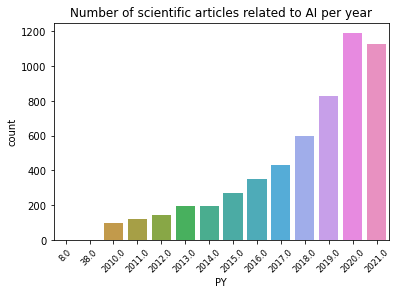

In [46]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df_filtered, x="PY").set_title('Number of scientific articles related to AI per year')


In [47]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [48]:
import spacy
import string
# spacy_pipeline = spacy.load("en_core_web_sm")
def split_into_tokens_spacy(desc) :
    """
    remove stop words + punctuation and tokenise the sentence
    """
    doc = nlp(desc)
    return [w.text.lower() for w in doc if not (w.is_stop or w.text in string.punctuation)]

In [49]:
tokens_spacy = df_filtered.head(n=1).TXT.apply(split_into_tokens_spacy)[0]
print(tokens_spacy)

['temperature', 'error', 'correction', 'method', 'surface', 'air', 'temperature', 'data', 'climate', 'change', 'computational', 'fluid', 'dynamics', 'correction', 'method', 'neural', 'network', 'algorithm', 'temperature', 'data', 'temperature', 'error', 'climate', 'change', 'research', 'accurate', 'temperature', 'data', 'demanded', 'affected', 'factors', 'especially', 'solar', 'radiation', 'accuracy', 'environmental', 'air', 'temperature', 'measurement', 'greatly', 'reduced', 'difference', 'temperature', 'environmental', 'air', 'related', 'temperature', 'measured', 'sensor', 'accommodated', 'inside', 'radiation', 'shield', 'paper', 'term', 'temperature', 'error', 'refers', 'temperature', 'difference', 'described', 'improve', 'accuracy', 'temperature', 'data', 'temperature', 'error', 'correction', 'method', 'proposed', 'computational', 'fluid', 'dynamics', 'cfd', 'method', 'adopted', 'quantify', 'temperature', 'errors', 'accurately', 'neural', 'network', 'algorithm', 'applied', 'form', 

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(tokenizer=split_into_tokens_spacy, min_df=0.01)
# Fit --> "apprentissage" du vocabulaire
bow_transformer.fit(df_filtered.TXT)
# Vocabulaire final : dimension des vecteurs
print(len(bow_transformer.vocabulary_))

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



1974


In [51]:
 # Vocabulaire
feat_names = bow_transformer.get_feature_names()
feat_names

['/-',
 '0',
 '0.5',
 '1',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1990',
 '2',
 '20',
 '2000',
 '2001',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2030',
 '2050',
 '21',
 '24',
 '25',
 '3',
 '30',
 '35',
 '3d',
 '4',
 '40',
 '5',
 '50',
 '6',
 '60',
 '7',
 '70',
 '8',
 '8.5',
 '80',
 '9',
 '90',
 '95',
 'ability',
 'able',
 'absence',
 'absolute',
 'abundance',
 'acceptable',
 'access',
 'according',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'accuracies',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'acquired',
 'acquisition',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'actual',
 'adapt',
 'adaptation',
 'adapted',
 'adaptive',
 'added',
 'addition',
 'additional',
 'additionally',
 'additive',
 'address',
 'addressed',
 'addressing',
 'adequate',

In [52]:
# Transformation de toutes les descriptions en sac de mots
descriptions_bow = bow_transformer.transform(df_filtered.TXT)

In [53]:
# Fréquences des mots et 10 mots les plus fréquents
from collections import Counter

frequencies = Counter()
for i, tok in enumerate(feat_names):
    frequencies[tok] = descriptions_bow.getcol(i).sum()
print(frequencies.most_common(10))

[('data', 10358), ('model', 8206), ('climate', 7322), ('learning', 6214), ('based', 5944), ('neural', 5250), ('models', 5165), ('change', 5021), ('study', 4526), ('machine', 4386)]


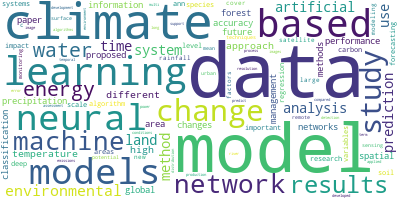

In [54]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

## Full dataframe with a new column AI = True or False

In [55]:
file_path = "data/clean_data/full_data_AI_col.csv"
df2 = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df2.head()


,PT,AU,TI,LA,DE,AB,C1,PY,TXT,AI
0,J,"Xu, B; Zhong, PA; Lu, QW; Zhu, FL; Huang, X; M...",Multiobjective stochastic programming with rec...,English,Reservoir operation; Flood water conservation;...,Flood water conservation realized through real...,China,2020.0,Multiobjective stochastic programming with rec...,False
1,J,"Xu, B; Li, Y; Han, F; Zheng, Y; Ding, W; Zhang...",The transborder flux of phosphorus in the Lanc...,English,Lancang-Mekong River; Phosphorus; Influence of...,Nutrients are critical to the development of p...,United States,2020.0,The transborder flux of phosphorus in the Lanc...,False
2,J,"Xu, M; Xu, LJ; Fang, HJ; Cheng, SL; Yu, GX; Ya...",Alteration in enzymatic stoichiometry controls...,English,Global change factors; Soil microbial communit...,Cultivated grassland can serve as one solution...,China,2020.0,Alteration in enzymatic stoichiometry controls...,False
3,J,"Yaghmaei, L; Koupaei, SS; Jafari, R",Spatiotemporal Response of Rangeland NPP to Dr...,English,rangeland ecosystems; net primary production; ...,This study explored the spatiotemporal variabi...,Iran,2020.0,Spatiotemporal Response of Rangeland NPP to Dr...,False
4,J,"Yang, J; Deng, X; Liu, QQ; Ding, RH",Temperature error-correction method for surfac...,English,climate change; computational fluid dynamics; ...,"In climate change research, accurate temperatu...",China,2020.0,Temperature error-correction method for surfac...,True


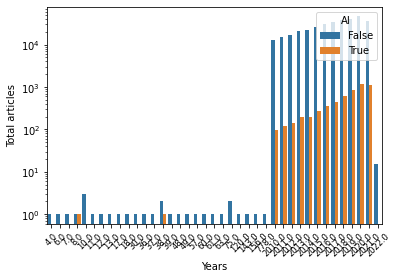

In [56]:

plt.xticks(rotation=45, fontsize="small")
g = sns.countplot(data=df2, x="PY", hue="AI")

g.set_yscale("log")
g.set(xlabel="Years", ylabel="Total articles")
plt.show()

# Log scale doesn't work so great, we need nb_publication_per_year/total_number of publication

In [57]:
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel

In [58]:

# Transformation du sac de mots au format attendu par Gensim
corpus_bow = Sparse2Corpus(descriptions_bow, documents_columns=False)
# Dictionnaire associant les identifiants des mots du vocabulaire au mot correspondant
id_2_word_dict = {i:feat_names[i] for i in range(len(feat_names))}
# Estimation du modèle LDA à partir du corpus
# Pour une explication des paramètres, voir https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = LdaModel(corpus=corpus_bow, 
                     id2word=id_2_word_dict, 
                     num_topics=3, chunksize=250, 
                     passes=10, per_word_topics=True,
                     random_state=40)
# Récupération des topics
all_topics = lda_model.print_topics(num_words=20)

In [59]:
for idx, topic in all_topics:
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.017*"energy" + 0.013*"system" + 0.012*"model" + 0.012*"neural" + 0.011*"network" + 0.011*"based" + 0.010*"learning" + 0.009*"environmental" + 0.009*"data" + 0.008*"artificial" + 0.007*"power" + 0.007*"paper" + 0.007*"proposed" + 0.006*"emissions" + 0.006*"algorithm" + 0.006*"prediction" + 0.006*"networks" + 0.006*"results" + 0.006*"systems" + 0.005*"time"

Topic: 1 
Words: 0.019*"model" + 0.016*"climate" + 0.016*"models" + 0.013*"data" + 0.012*"neural" + 0.009*"water" + 0.009*"study" + 0.008*"precipitation" + 0.008*"temperature" + 0.008*"network" + 0.008*"results" + 0.008*"change" + 0.007*"rainfall" + 0.007*"prediction" + 0.007*"based" + 0.006*"artificial" + 0.006*"soil" + 0.006*"ann" + 0.006*"variables" + 0.006*"regression"

Topic: 2 
Words: 0.024*"data" + 0.010*"change" + 0.010*"classification" + 0.010*"land" + 0.009*"climate" + 0.008*"learning" + 0.008*"based" + 0.008*"environmental" + 0.007*"species" + 0.007*"cover" + 0.006*"analysis" + 0.006*"use" + 0.006*"chang

In [60]:
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_bow, 
                                     Dictionary.from_corpus(corpus_bow, id_2_word_dict),
                                     sort_topics=False)
# Sauvegarde de la visualisation dans un fichier
pyLDAvis.save_html(vis, 'winemag_lda.html')

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [61]:
# Ajout des colonnes dans le DataFrame
n_topics = 5
for i in range(n_topics):
    df_filtered[f'topic_{i+1}'] = 0.0
# Ajout des poids
for i in range(descriptions_bow.shape[0]):
    doc_i = Sparse2Corpus(descriptions_bow.getrow(i), documents_columns=False)
    doc_i_topics = lda_model.get_document_topics(doc_i)[0]
    for (topic, weight) in doc_i_topics:
        df_filtered.loc[i, f'topic_{topic+1}'] = weight

In [62]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058338  0.134815       1        1  28.971377
1     -0.164237 -0.023736       2        1  37.586441
2      0.105899 -0.111079       3        1  33.442181, topic_info=                Term         Freq        Total Category  logprob  loglift
632           energy  3562.000000  3562.000000  Default  30.0000  30.0000
1162           model  7649.000000  7649.000000  Default  29.0000  29.0000
306   classification  2360.000000  2360.000000  Default  28.0000  28.0000
1364   precipitation  2199.000000  2199.000000  Default  27.0000  27.0000
1167          models  5142.000000  5142.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
1081         machine  1286.987424  3551.768018   Topic3  -5.2188   0.0802
1137          method  1190.239707  2916.492197   Topic3  -5.2969   0.1991
164         approach  1089.075634  2673.634657   Topic3  -5.3858   0.1972
1748           study  1189.353469  4342.255267   Topic3  -5.2977  -0.1996
1553         results  1105.989761  4343.812400   Topic3  -5.3704  -0.2727

[234 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
121       1  0.998357             ai
128       1  0.553631      algorithm
128       2  0.245140      algorithm
128       3  0.201070      algorithm
142       1  0.249698       analysis
...     ...       ...            ...
1931      3  0.950202  vulnerability
1936      1  0.995818          waste
1937      1  0.135504          water
1937      2  0.770720          water
1937      3  0.093517          water

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

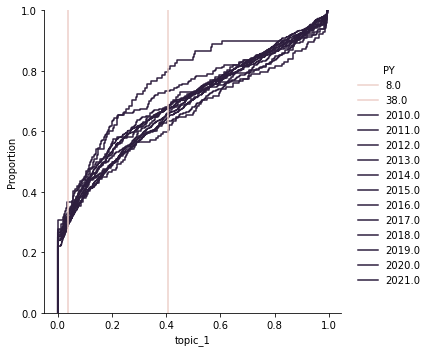

In [63]:
sns.displot(df_filtered, x="topic_1", hue="PY", kind="ecdf")

<AxesSubplot:ylabel='PY'>

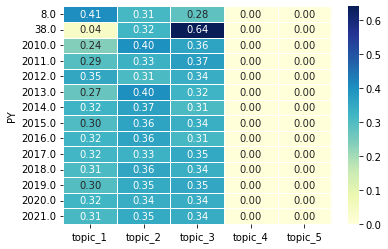

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [64]:
topic_means = df_filtered[['PY', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].groupby('PY').mean()
sns.heatmap(topic_means, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)